# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [3]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [4]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

In [7]:
# np.argmax()
a = np.array([[1,2,3],[3,1,2]])
a

array([[1, 2, 3],
       [3, 1, 2]])

In [8]:
np.argmax(a, axis = 0)

array([1, 0, 0])

In [9]:
np.argmax(a, axis = 1)

array([2, 0])

In [10]:
np.argmax(a)

2

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [11]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [12]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [13]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [16]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링1

### (1) 모델 설계

In [17]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [18]:
# 메모리 정리
clear_session()

# Sequential 
model = Sequential( Dense( 3 , input_shape = (nfeatures,), activation = 'softmax') )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

* 학습결과 그래프

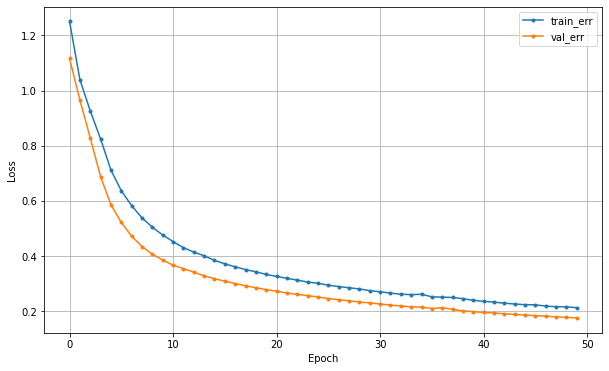

In [20]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [21]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 3ms/step


array([[9.6893382e-01, 3.0914659e-02, 1.5143632e-04],
       [1.7674142e-02, 7.9808110e-01, 1.8424478e-01],
       [2.1283615e-02, 7.2939050e-01, 2.4932583e-01],
       [1.0448594e-03, 3.7526634e-01, 6.2368864e-01],
       [4.4328466e-02, 8.7283564e-01, 8.2836017e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [22]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [23]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       2])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다. 

In [ ]:
y_val

In [25]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 17  1]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      0.94      0.87        18
           2       0.91      0.71      0.80        14

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



----

## 4.모델링2 : hidden layer

### (1) 모델1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [26]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8 , input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3 , activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

* 학습결과 그래프

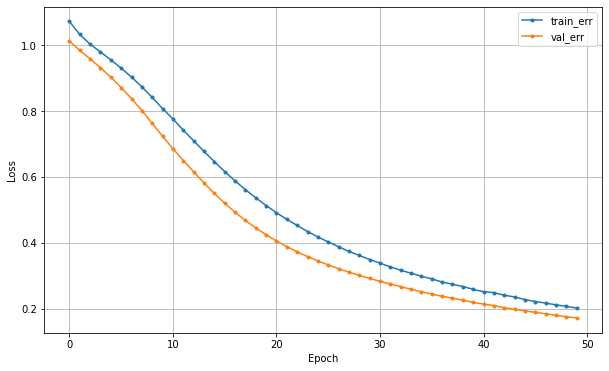

In [28]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [29]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 [==============================] - 0s 4ms/step


In [30]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



### (2) 모델2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [32]:
m3 = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                 Dense(8, activation= 'relu'),
                 Dense(3, activation= 'softmax')])
m3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


* compile + 학습

In [ ]:
m3.compile(optimizer= Adam(learning_rate=0.1), loss = 'sparse_categorical_crossentropy')  # learning_rate : 0.1, 0.01, 0.001
hist = m3.fit(x_train, y_train, epochs = 50, validation_split = .2 ).history

* 학습결과 그래프

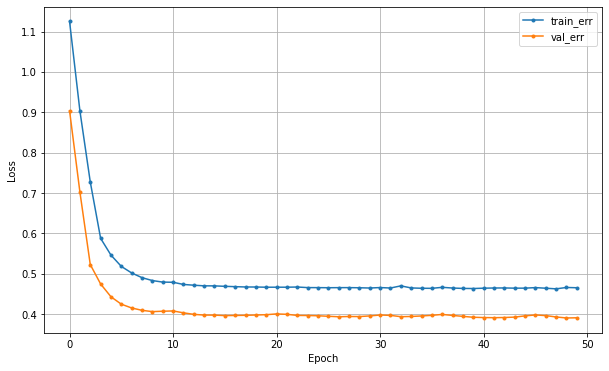

In [34]:
dl_history_plot(hist)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [36]:
pred = m3.predict(x_val)
pred = pred.argmax(axis = 1)

2/2 [==============================] - 0s 4ms/step


In [37]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[13  0  0]
 [ 0  0 18]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        18
           2       0.44      1.00      0.61        14

    accuracy                           0.60        45
   macro avg       0.48      0.67      0.54        45
weighted avg       0.42      0.60      0.48        45



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (3) 모델3

* 여러분이 원하는 형태로 설계를 해 봅시다.

* compile + 학습

* 학습결과 그래프

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [38]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [40]:
y_c = to_categorical(y.values, 3)

In [41]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [42]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [43]:
y_train.shape

(105, 3)

### (3) Scaling

In [44]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [45]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [46]:
# 메모리 정리
clear_session()

# Sequential 
model = Sequential([Dense(3, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

* 학습결과 그래프

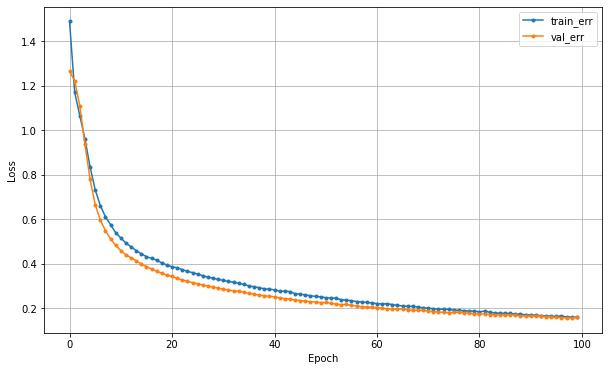

In [48]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [49]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[5.6254437e-05, 7.4149109e-02, 9.2579460e-01],
       [6.3559155e-06, 1.0243190e-01, 8.9756179e-01],
       [9.4587767e-01, 5.4117817e-02, 4.5310335e-06],
       [1.1751787e-03, 4.0057829e-01, 5.9824640e-01],
       [9.7786874e-01, 2.2130150e-02, 1.0825154e-06]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

In [ ]:
y_val

In [51]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [ ]:
y_val[:5]

In [52]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

In [53]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 15  0]
 [ 0  3 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        15
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45

